In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [2]:
data_path = '../data/titanic.csv'

df = pd.read_csv(data_path)
features_original = df.columns

print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Exploratory Data Analysis (EDA)

## Setup for EDA

In [4]:
descriptive_col_names = [
    'Passenger ID',
    'Survived',
    'Ticket Class',
    'Name',
    'Sex',
    'Age',
    '# of Siblings / Spouses',
    '# of Parents / Children',
    'Ticket',
    'Fare',
    'Cabin',
    'Embarked'
]

renamed_cols = {
    col: new_col for col, new_col in zip(
        df.columns, descriptive_col_names
    )
}

In [5]:
df = df.rename(columns=renamed_cols)

features_num = [
    'Age',
    '# of Siblings / Spouses',
    '# of Parents / Children',
    'Fare'
]

features_cat = [
    'Survived',
    'Ticket Class',
    'Sex',
    'Embarked'
]

## Preliminar Analysis

### There is a duplicated `Passenger ID`?

In [7]:
print(df['Passenger ID'].nunique())
print(len(df['Passenger ID']))

891
891


In [ ]:
all(df['PassengerId'].values == range(1, len(df)+1))

True

### What are the possible values of the categorical columns?

In [ ]:
for col in features_cat:
    print(col, '=', df[col].value_counts().index.values)

Survived = [0 1]
Ticket Class = [3 1 2]
Sex = ['male' 'female']
Embarked = ['S' 'C' 'Q']


### Getting some summary statistics about the data

In [ ]:
df_desc = df.describe()
df_desc

,Passenger ID,Survived,Ticket Class,Age,# of Siblings / Spouses,# of Parents / Children,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


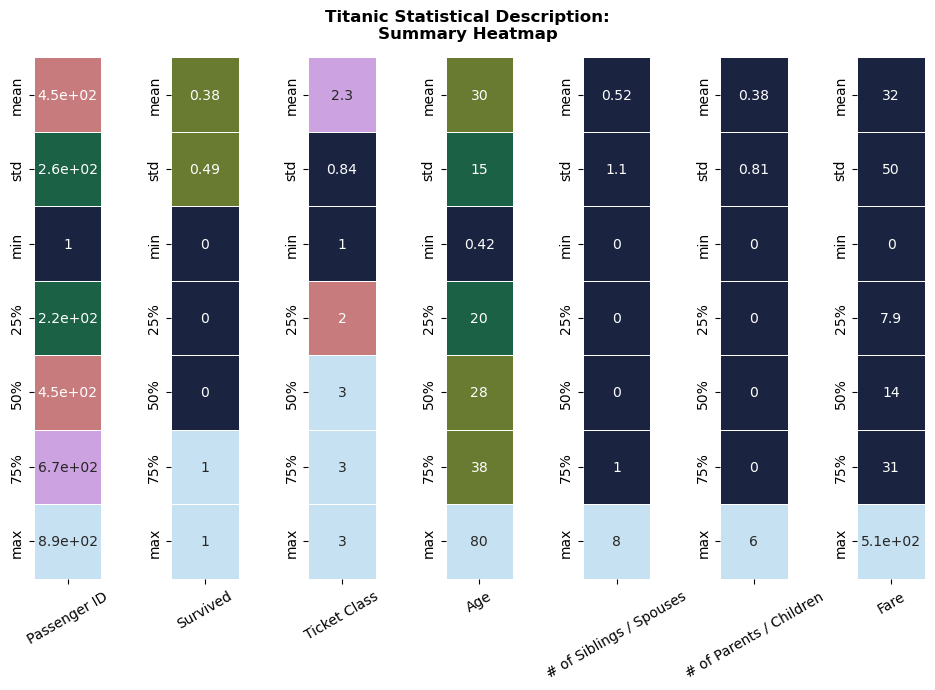

In [ ]:
# visualizing the statistical description

subplot_width = 1.35

fig, ax = plt.subplots(
    1, len(df_desc.columns),
    figsize=(
        len(df_desc.columns)*subplot_width, 7
    )
);

colormaps = [
    sns.color_palette('cubehelix') for i in range(7)
]

fig.suptitle(
    'Titanic Statistical Description:\n' \
        'Summary Heatmap',
    fontweight='bold'
);

for i, j in enumerate(range(1, len(df_desc))):
    sns.heatmap(
        df_desc.iloc[1:,j-1:j],
        annot=True, 
        linewidth=.5,
        cbar=False,
        cmap=colormaps[i],
        ax=ax[i]
    );

    for xtick in ax[i].get_xticklabels():
        xtick.set_rotation(30);

plt.tight_layout();

## Univariate Analysis

### What are the histogram and boxplot of the numerical features?

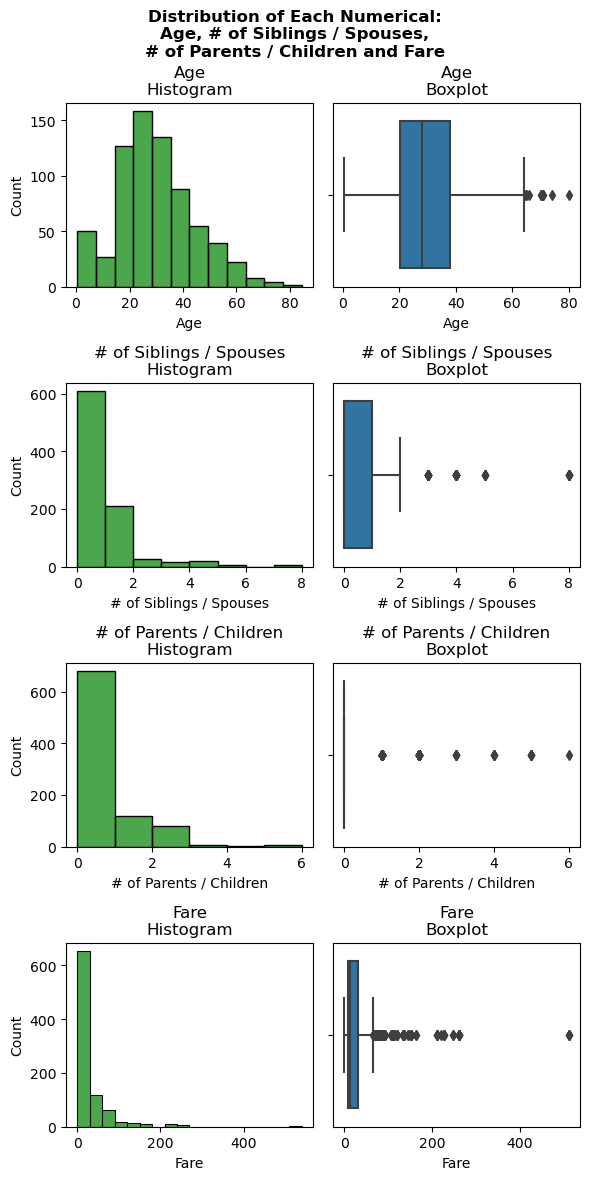

In [ ]:
fig_width, fig_height = 3, 3

fig, ax = plt.subplots(
    len(features_num), 2,
    figsize=(
        fig_width*2,
        fig_height*len(features_num)
    )
)

bin_widths = [7, 1, 1, 30]

for i, col in enumerate(features_num):
    sns.histplot(
        x=col,
        data=df,
        binwidth=bin_widths[i],
        color='g',
        alpha=.7,
        ax=ax[i,0]
    );

    sns.boxplot(
        x=col,
        data=df, 
        ax=ax[i,1]
    );
    
    ax[i,0].set_title(f'{col}\nHistogram');
    ax[i,1].set_title(f'{col}\nBoxplot');

plt.suptitle(
    'Distribution of Each Numerical:\n' \
        '(i) Age, (ii) # of Siblings / Spouses,\n' \
        '(iii) # of Parents / Children and (iv) Fare', 
    fontweight='bold'
);

plt.tight_layout();

### What are the frequency of each categorical features?

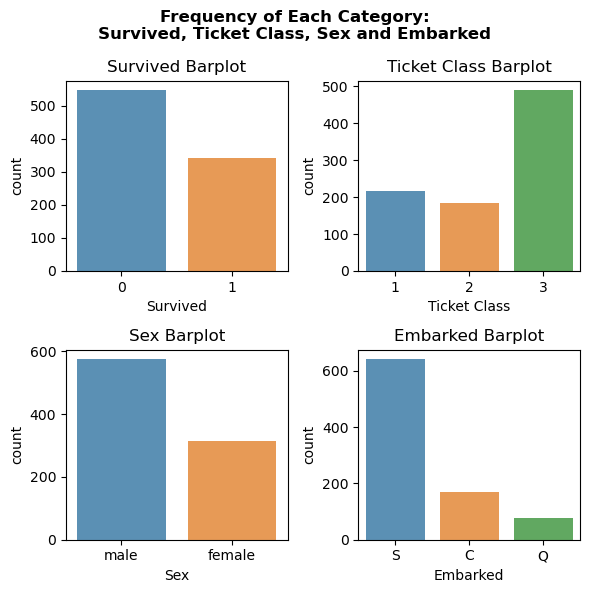

In [ ]:
fig_width, fig_height = 3, 3

fig, ax = plt.subplots(
    2, 2,
    figsize=(
        fig_width*2,
        fig_height*2
    )
)

ax_flat = ax.flatten()

for i, col in enumerate(features_cat):
    sns.countplot(
        x=col, 
        data=df, 
        alpha=.8,
        ax=ax_flat[i]
    );

    ax_flat[i].set_title(f'{col} Barplot');

plt.suptitle(
    'Frequency of Each Category:\n' \
        '(i) Survived, (ii) Ticket Class, ' \
        '(iii) Sex and (iv) Embarked', 
    fontweight='bold'
);

plt.tight_layout();

## Bivariate Analysis

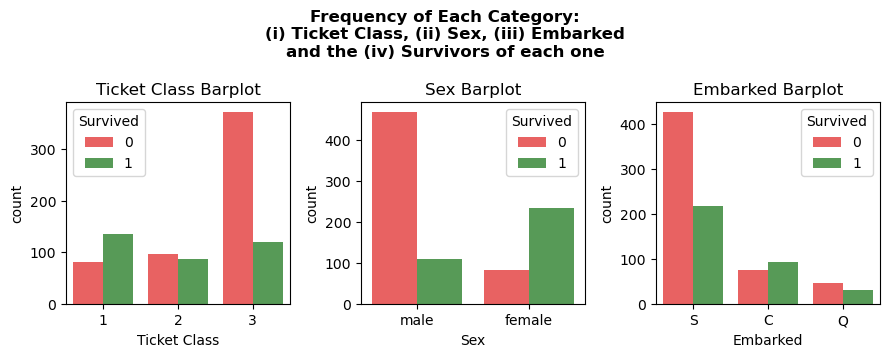

In [ ]:
fig_width, fig_height = 3, 3

fig, ax = plt.subplots(
    1, 3,
    figsize=(
        fig_width*3,
        fig_height*1.2
    )
)

ax_flat = ax.flatten()

for i, col in enumerate(features_cat[1:]):
    sns.countplot(
        x=col, 
        data=df, 
        hue='Survived',
        palette=['r', 'g'],
        alpha=.7,
        ax=ax_flat[i], 
    );

    ax_flat[i].set_title(f'{col} Barplot');

plt.suptitle(
    'Frequency of Each Category:\n' \
        '(i) Ticket Class, (ii) Sex, (iii) Embarked\n' \
        'and the (iv) Survivors of each one', 
    fontweight='bold'
);

plt.tight_layout();

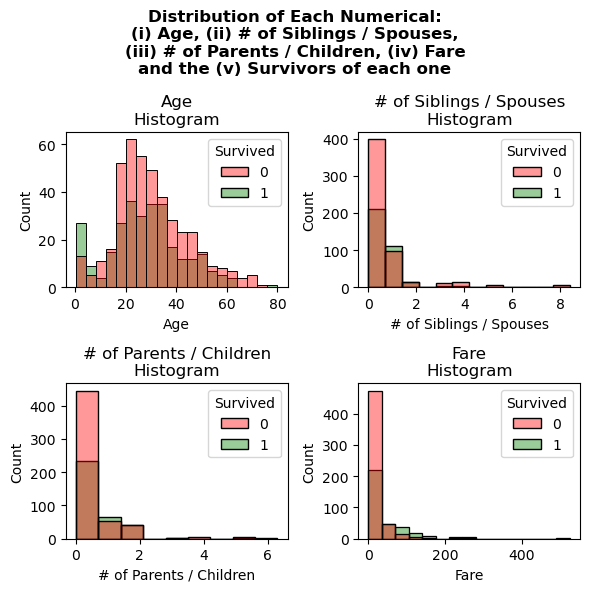

In [ ]:
fig_width, fig_height = 3, 3

fig, ax = plt.subplots(
    2, 2,
    figsize=(
        fig_width*2,
        fig_height*2
    )
)

ax_flat = ax.ravel()
bin_widths = [None, .7, .7, 35]

for i, col in enumerate(features_num):
    sns.histplot(
        x=col, 
        data=df, 
        binwidth=bin_widths[i],
        hue='Survived',
        palette=['r', 'g'],
        alpha=.4,
        ax=ax_flat[i]
    );
    
    ax_flat[i].set_title(f'{col}\nHistogram');

plt.suptitle(
    'Distribution of Each Numerical:\n' \
        '(i) Age, (ii) # of Siblings / Spouses,\n' \
        '(iii) # of Parents / Children, (iv) Fare\n' \
        'and the (v) Survivors of each one', 
    fontweight='bold'
);

plt.tight_layout();

## Multivariate Analysis

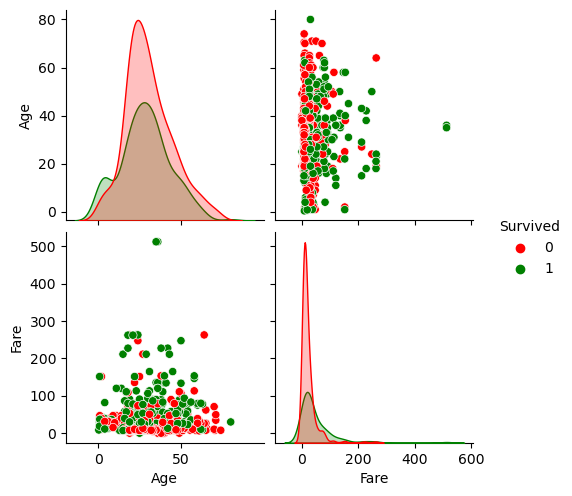

In [ ]:
features_set = [
    'Survived',
    'Age',
    'Fare'
]

sns.pairplot(
    data=df[features_set],
    hue='Survived',
    palette=['r', 'g']
);

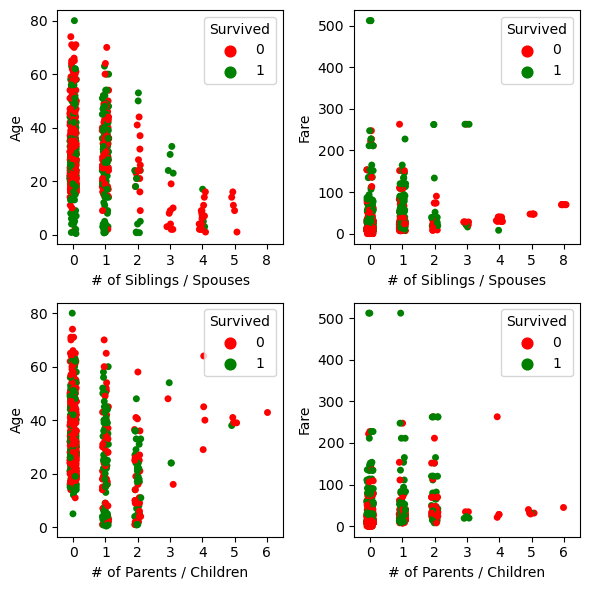

In [ ]:
fig_width, fig_height = 3, 3

fig, ax = plt.subplots(
    2, 2,
    figsize=(
        fig_width*2,
        fig_height*2
    )
)

features_set = [
    '# of Siblings / Spouses',
    '# of Parents / Children'
]

for i, col in enumerate(features_set):
    sns.stripplot(
        x=col, 
        y='Age', 
        data=df, 
        hue='Survived', 
        palette=['r', 'g'],
        ax=ax[i,0]
    );

    sns.stripplot(
        x=col, 
        y='Fare', 
        data=df, 
        hue='Survived',
        palette=['r', 'g'],
        ax=ax[i,1]
    );

plt.tight_layout();